<a href="https://colab.research.google.com/github/mertqara/PopularGameGenres/blob/main/dataVisualisationAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub
url = "http://raw.githubusercontent.com/mertqara/PopularGameGenres/refs/heads/main/cleaned_merged_final_data.csv"
eda_df = pd.read_csv(url)

# Clean and prepare
eda_df['Release_Year'] = eda_df['Release_Year'].astype('Int64')
eda_df['MetaScore'] = pd.to_numeric(eda_df['MetaScore'], errors='coerce')
eda_df['UserReview'] = pd.to_numeric(eda_df['UserReview'], errors='coerce')

# Create AAA vs Indie label
aaa_publishers = ['Nintendo', 'Sony', 'Electronic Arts', 'Ubisoft', 'Activision',
                  'Microsoft Game Studios', 'Take-Two Interactive', 'Bethesda Softworks']
eda_df['Studio_Type'] = eda_df['Publisher'].apply(
    lambda x: 'AAA' if any(big in str(x) for big in aaa_publishers) else 'Indie'
)

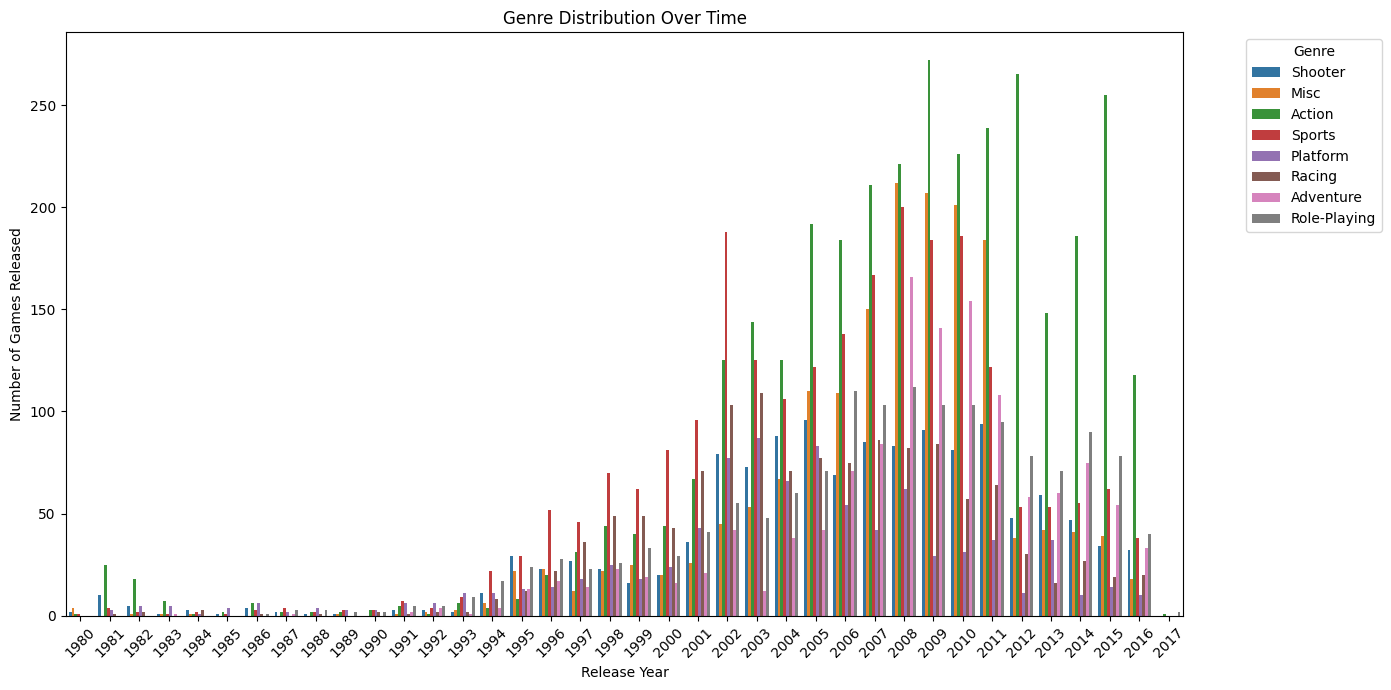

In [7]:
# ✅ 2.1 Genre Distribution Over Time
genre_over_time = eda_df.dropna(subset=['Genre', 'Release_Year'])
genre_over_time['Genre'] = genre_over_time['Genre'].str.strip()

# Plot genre trend
plt.figure(figsize=(14, 7))
top_genres = genre_over_time['Genre'].value_counts().nlargest(8).index
genre_trend = genre_over_time[genre_over_time['Genre'].isin(top_genres)]

sns.countplot(data=genre_trend, x='Release_Year', hue='Genre')
plt.title('Genre Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

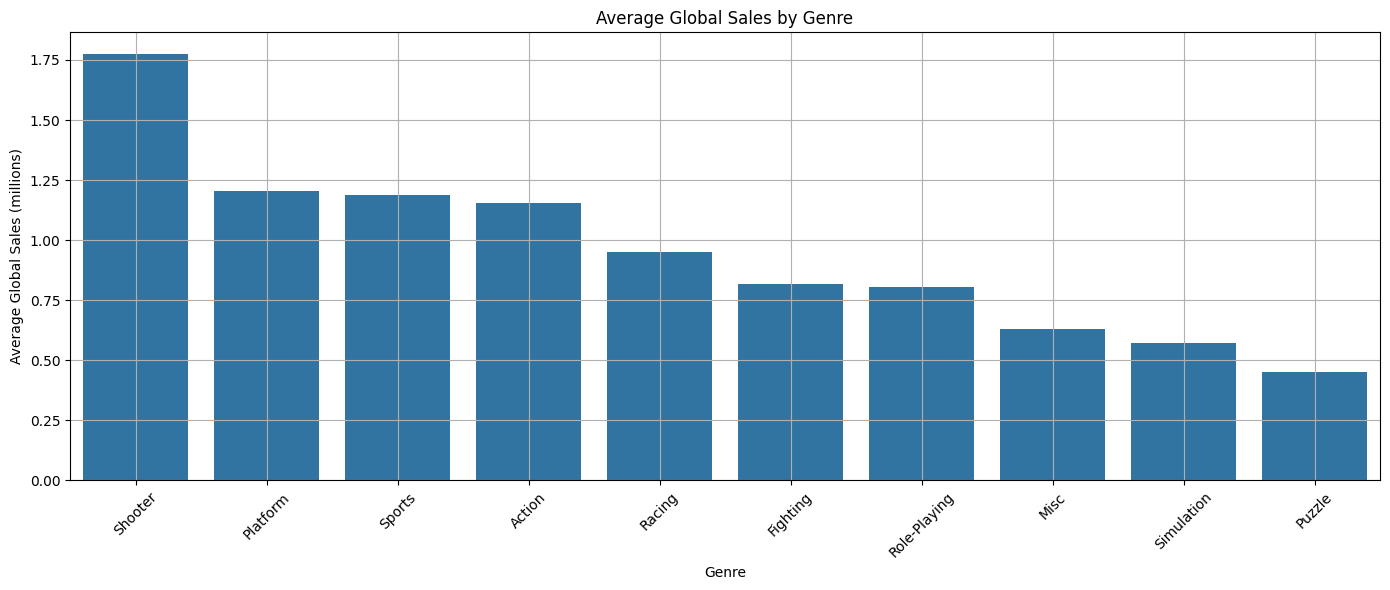

In [4]:
# 2.2 Sales Trends by Genre (Average Global Sales)
plt.figure(figsize=(14, 6))
genre_sales = eda_df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Average Global Sales by Genre')
plt.ylabel('Average Global Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

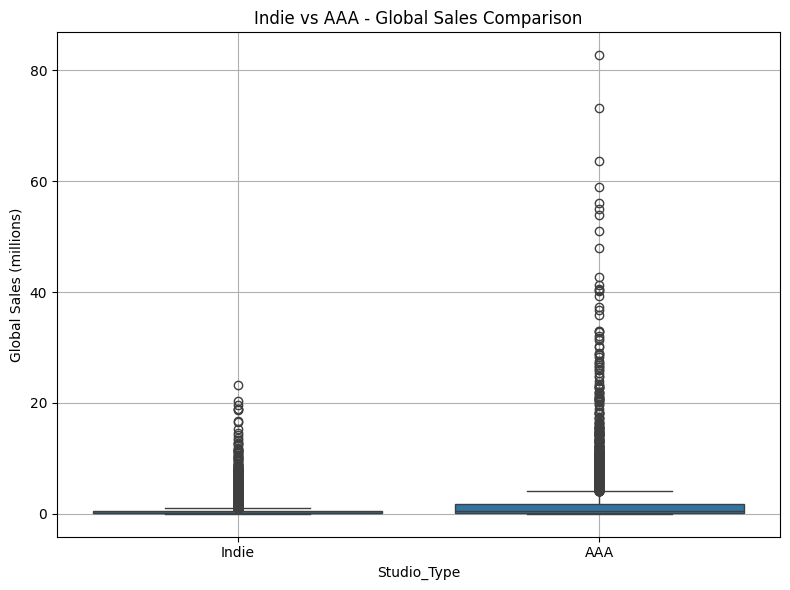

In [5]:
# 2.3 Indie vs AAA Impact on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df, x='Studio_Type', y='Global_Sales')
plt.title('Indie vs AAA - Global Sales Comparison')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

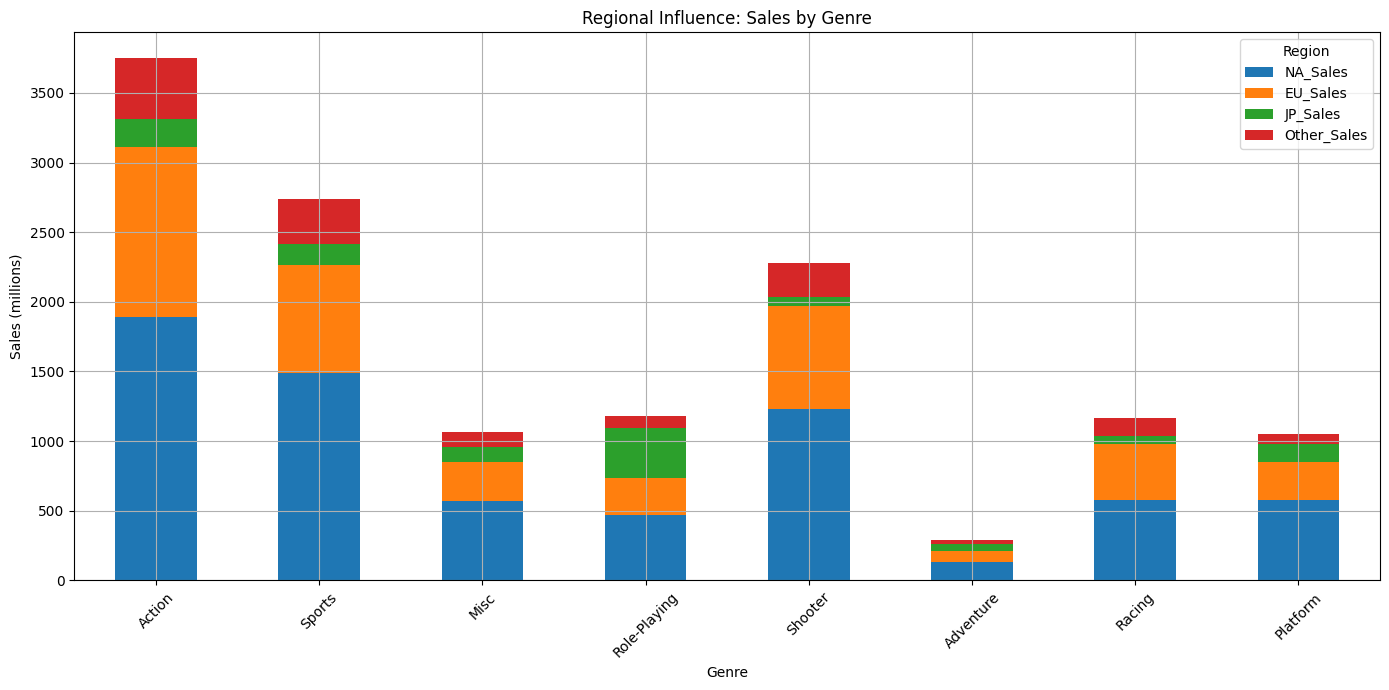

In [6]:
# 2.4 Regional Influence (Favorite Genre by Region)
region_sales = eda_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales = region_sales.loc[top_genres]

region_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Regional Influence: Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()